![Decision Tree](https://pbs.twimg.com/media/FQi8zzfWUAU5H4D?format=jpg&name=medium)

A decision tree is a largely used non-parametric effective machine learning modeling technique for regression and classification problems. To find solutions a decision tree makes a sequential, hierarchical decision about the outcomes variable based on the predictor data.

[Click to see my article on Decision Tree](https://medium.com/machine-learning-researcher/decision-tree-algorithm-in-machine-learning-248fb7de819e)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 1: </font> <font color = #4854E8> Information of Dataset </font>

<b>Chronic Kidney Disease Dataset:</b> The Dataset contain the information of Chronic Kidney which have 400 numbers of instances and 26 number of features. The Task is to predict the chronic kidney disease either is positive(ckd) or not(notckd).

`Attrbute Informations:`<br>
age - age <br>
bp - blood pressure<br>
sg - specific gravity<br>
al - albumin<br>
su - sugar<br>
rbc - red blood cells<br>
pc - pus cell<br>
pcc - pus cell clumps<br>
ba - bacteria<br>
bgr - blood glucose random<br>
bu - blood urea<br>
sc - serum creatinine<br>
sod - sodium<br>
pot - potassium<br>
hemo - hemoglobin<br>
pcv - packed cell volume<br>
wc - white blood cell count<br>
rc - red blood cell count<br>
htn - hypertension<br>
dm - diabetes mellitus<br>
cad - coronary artery disease<br>
appet - appetite<br>
pe - pedal edema<br>
ane - anemia<br>
class - classification<br>

https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 1.1: </font> <font color = #41EA46> Import Libraries and Dataset </font>

#### <font color = blue>Import the Libraries

In [59]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score

#### <font color = blue>Import the Dataset

In [60]:
df = pd.read_csv('Dataset/kidney_disease.csv', index_col = "id") 
pd. set_option('display.max_columns', 30)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


### <font color = #27C3E5> 1.2: </font> <font color = #41EA46> Data Information </font>

#### <font color = blue>Data shape

In [61]:
df.shape

(400, 25)

#### <font color = blue> Data Info

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

#### <font color = blue> Data Description

In [63]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 2: </font> <font color = #4854E8> Data Preprocessing </font>

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 2.1: </font> <font color = #41EA46> Change the Datatype (Misunderstood) </font>

#### <font color = blue> Check the dtype

In [64]:
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

As we can see that `pcv`, `wc` and `rc` have object type but infact it's int.

#### <font color = blue> Convert to int dtype

In [65]:
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')

In [66]:
df[['pcv', 'wc', 'rc']].dtypes

pcv    float64
wc     float64
rc     float64
dtype: object

### <font color = #27C3E5> 2.2: </font> <font color = #41EA46> Extracting Numerical and Object Cols and Perform Operation if needed</font>

#### <font color = blue> Extract Numerical and Obj Cols

In [67]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

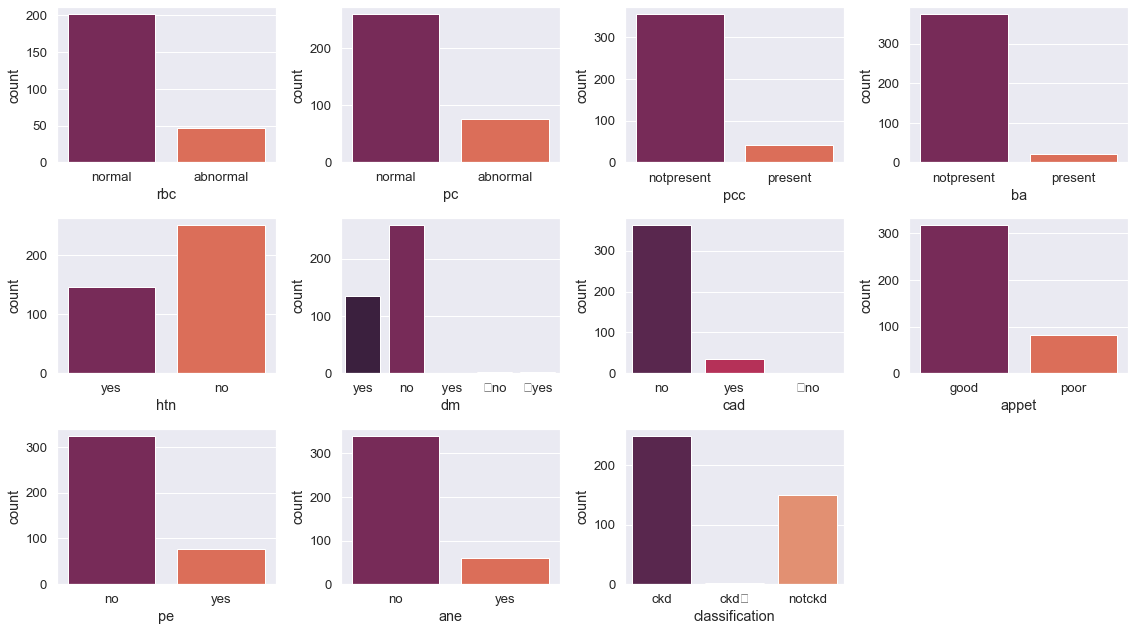

In [68]:
# looking at Obj columns

plt.figure(figsize = (16, 9))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

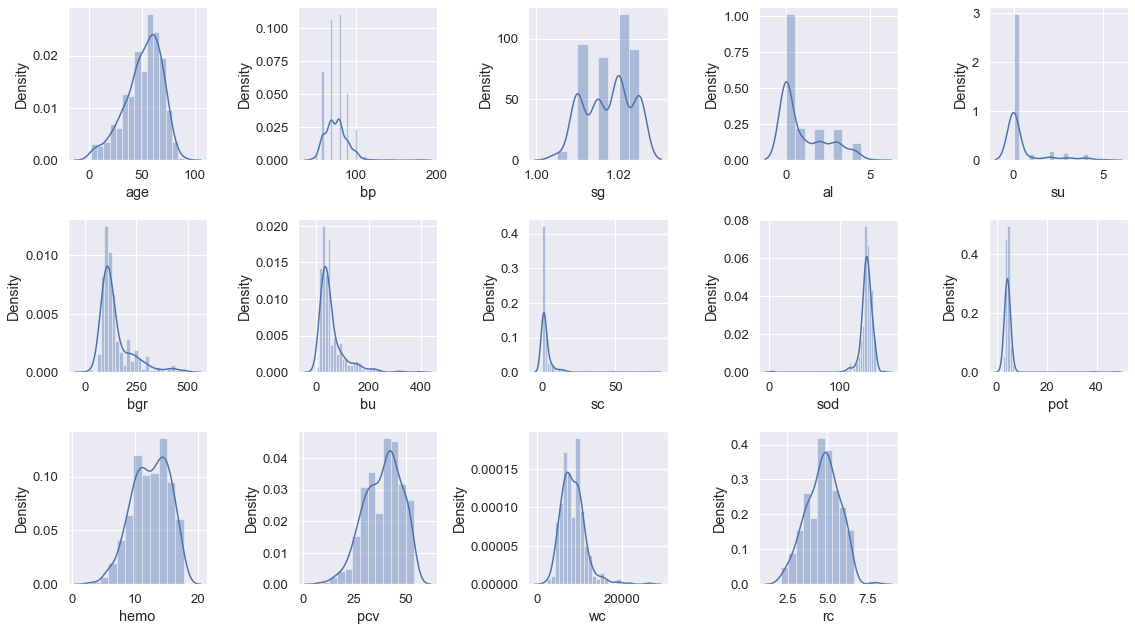

In [69]:
# checking numerical features distribution

plt.figure(figsize = (16, 9))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

#### <font color = blue>Lets look in unique value at Obj Cols

In [70]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

rbc has [nan 'normal' 'abnormal'] values

pc has ['normal' 'abnormal' nan] values

pcc has ['notpresent' 'present' nan] values

ba has ['notpresent' 'present' nan] values

htn has ['yes' 'no' nan] values

dm has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

cad has ['no' 'yes' '\tno' nan] values

appet has ['good' 'poor' nan] values

pe has ['no' 'yes' nan] values

ane has ['no' 'yes' nan] values

classification has ['ckd' 'ckd\t' 'notckd'] values



> wait wait what is `t\no`, `\yes` and `ckd\t`

There is some ambugity present in `dm`, `cad` and `classification` columns we have to remove that.

#### <font color = blue> Remove Ambugity in Respected Obj Col

In [71]:
df['dm'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['cad'] = df['cad'].replace(to_replace = '\tno', value='no')

df['classification'] = df['classification'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

#### <font color = blue>Lets check the correlation in Numerical Cols

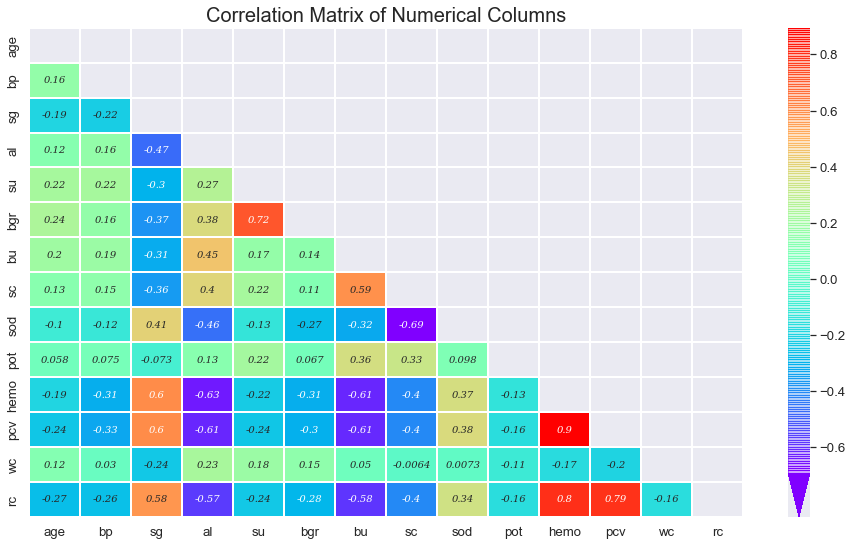

In [72]:
# Define the figure size
plt.figure(figsize = (16, 9))

# Cutomize the annot
annot_kws={'fontsize':10,                      # To change the size of the font
           'fontstyle':'italic',               # To change the style of font 
           'fontfamily': 'serif',              # To change the family of font 
           'alpha':1 }                         # To change the transparency of the text  


# Customize the cbar
cbar_kws = {"shrink":1,                        # To change the size of the color bar
            'extend':'min',                    # To change the end of the color bar like pointed
            'extendfrac':0.1,                  # To adjust the extension of the color bar
            "drawedges":True,                  # To draw lines (edges) on the color bar
           }

# take upper correlation matrix
matrix = np.triu(df.corr())

# Generate heatmap correlation
ax = sns.heatmap(df.corr(), mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Matrix of Numerical Columns', fontsize = 20)

# Set the size of text
sns.set(font_scale = 1.2)

> Yes there is some cols who has high positive correlation (note > red color)

#### <font color = blue> Eliminate High Corr Feature

In [73]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

# Check those cols who has more than 70% correlation
corr_features= correlation(df, 0.7)
corr_features

{'bgr', 'pcv', 'rc'}

we found that 3 cols who has more than 70% corelation 

In [74]:
# Remove those cols (more than 70% correlation)
df = df.drop(corr_features,axis=1)
df.shape   # 25 - 3 = 22

(400, 22)

### <font color = #27C3E5> 2.3: </font> <font color = #41EA46> Handle Missing Value</font>

#### <font color = blue> Check the missing value

In [75]:
# whole dataset
df.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bu                 19
sc                 17
sod                87
pot                88
hemo               52
wc                106
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [76]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [77]:
# check the missing value in Numerical Col
df[num_cols].isnull().sum()

age       9
bp       12
sg       47
al       46
su       49
bu       19
sc       17
sod      87
pot      88
hemo     52
wc      106
dtype: int64

In [78]:
# check the missing value in Obj Col
df[cat_cols].isnull().sum()

rbc               152
pc                 65
pcc                 4
ba                  4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

#### <font color = blue> Method that we used to handle Missing Value

In [79]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

#### <font color = blue> Handle Missing Values in Numerical Cols

In [80]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [81]:
# check after apply opr
df[num_cols].isnull().sum().sum()

0

#### <font color = blue> Handle Missing Values in Obj Cols

In [82]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('rbc')
random_value_imputation('pc')

for col in cat_cols:
    impute_mode(col)

In [83]:
# check after apply opr
df[cat_cols].isnull().sum().sum()

0

### <font color = #27C3E5> 2.4: </font> <font color = #41EA46> Feature Encoding </font>

#### <font color = blue> Check the categories cols

In [84]:
df[cat_cols]

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,not ckd
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,not ckd
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,not ckd


#### <font color = blue> Check the categories of each cols

In [85]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

rbc has 2 categories

pc has 2 categories

pcc has 2 categories

ba has 2 categories

htn has 2 categories

dm has 2 categories

cad has 2 categories

appet has 2 categories

pe has 2 categories

ane has 2 categories

classification has 2 categories



>As we can in our obj cols each has 2 categories so we don't need to apply One Hot Encoder. Becuase label Encoder work here to convert into 0 and 1

#### <font color = blue> Label Encoder

In [86]:
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [87]:
df[cat_cols]

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,
0,1,1,0,0,1,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,1,0,1,0
3,1,0,1,0,1,0,0,1,1,1,0
4,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,1,0,0,0,0,0,0,0,0,1
396,1,1,0,0,0,0,0,0,0,0,1
397,1,1,0,0,0,0,0,0,0,0,1


### <font color = #27C3E5> 2.5: </font> <font color = #41EA46> Define Predictor and Target Attribute </font>

In [88]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

#### <font color = blue> Predictor Atributes

In [89]:
X.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bu,sc,sod,pot,hemo,wc,htn,dm,cad,appet,pe,ane
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,36.0,1.2,136.0,3.8,15.4,7800.0,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,18.0,0.8,150.0,3.5,11.3,6000.0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,53.0,1.8,135.0,4.4,9.6,7500.0,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,56.0,3.8,111.0,2.5,11.2,6700.0,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,26.0,1.4,140.0,4.9,11.6,7300.0,0,0,0,0,0,0


#### <font color = blue> Target Atribute

In [90]:
Y.unique() # chronic kidney disease either is ckd(0) or notckd (1)

array([0, 1])

### <font color = #27C3E5> 2.4: </font> <font color = #41EA46> Split the Data into Train and Test </font>

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#### <font color = blue> Training Data

In [92]:
print("X_train", X_train.shape)
print("Y_train", y_train.shape)

X_train (320, 21)
Y_train (320,)


#### <font color = blue> Testing Data

In [93]:
print("X_test", X_test.shape)
print("X_test", y_test.shape)

X_test (80, 21)
X_test (80,)


![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 3: </font> <font color = #4854E8> Build Decision Tree Model </font>
In this part, we build Decision Tree with sklearn.

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 3.1: </font> <font color = #41EA46> Decision Tree without Pruning</font>

#### <font color = blue> Import Model from Scikit-learn

In [136]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

#### <font color = blue> Initialize the Model

In [137]:
dt_sklearn = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

#### <font color = blue> Fit the Training Data into Model

In [138]:
dt_sklearn.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

#### <font color = blue> Plot the Decision Tree

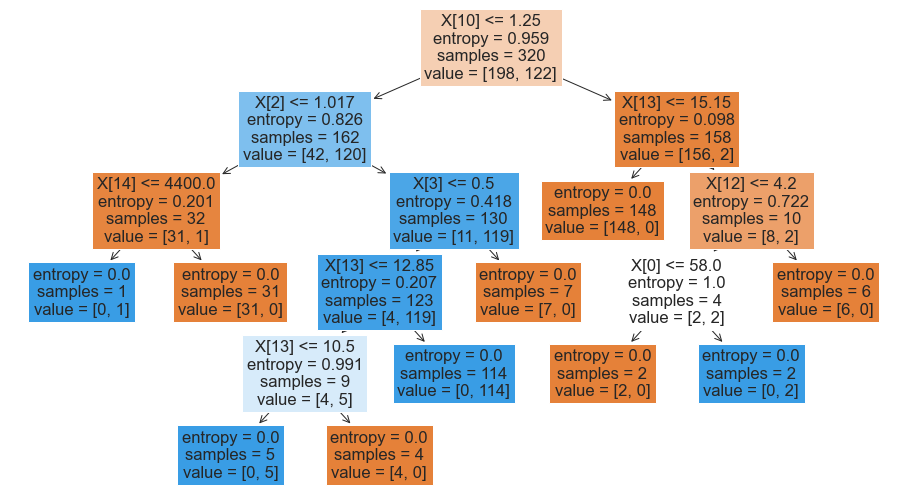

In [139]:
plt.figure(figsize = (16, 9))
plot_tree(dt_sklearn, filled=True)
plt.show()

#### <font color = blue> Predict the Data</font>

In [144]:
dt_sklearn_pred_test = dt_sklearn.predict(X_test)
dt_sklearn_pred_train = dt_sklearn.predict(X_train)

#### <font color = blue> Check the training and test accuracy</font>

In [151]:
Accuracy_train = accuracy_score(dt_sklearn_pred_train, y_train)
Accuracy_test = accuracy_score(dt_sklearn_pred, y_test)
print(f"Training Accuracy is {Accuracy_train}")
print(f"Test Accuracy is {Accuracy_test}")

Training Accuracy is 1.0
Test Accuracy is 0.9625


There is small difference between Test and Train accuracy may be some overfit model?
Let's Do Pruning of Decision Tree if there will effect on accuracy

### <font color = #27C3E5> 3.2: </font> <font color = #41EA46> Decision Tree with Pruning</font>

#### <font color = blue> cost complexity pruning path

To get the different applicable alpha values and corresponding impurity in the leaf nodes introduced due to that, we can use the cost_complexity_pruning_path function present in the DecisionTreeClassifier class.

In [153]:
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.        , 0.01128013, 0.02006223, 0.02579791, 0.02787401,
        0.05164464, 0.09038995, 0.22800259, 0.49258848]),
 'impurities': array([0.        , 0.02256025, 0.04262249, 0.0684204 , 0.09629441,
        0.14793905, 0.238329  , 0.46633159, 0.95892008])}

#### <font color = blue> plot to see the relation.

Text(0, 0.5, 'total impurity of leaves')

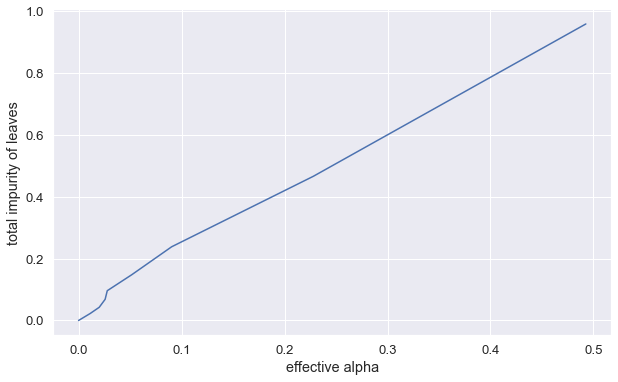

In [154]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

#### <font color = blue> finding an optimal value of alpha

In [159]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion = 'entropy', random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

As we already know that there is a strong relation between, alpha and the depth of the tree. We can find the relation using this plot.

Text(0, 0.5, 'total depth')

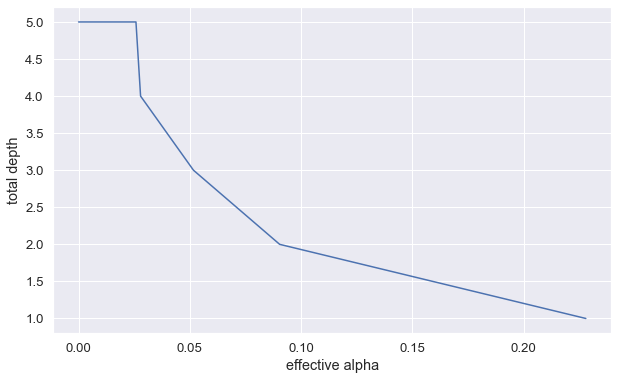

In [160]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("total depth")

#### <font color = blue> find the relation between alpha and accuracy.

Text(0, 0.5, 'Accuracy scores')

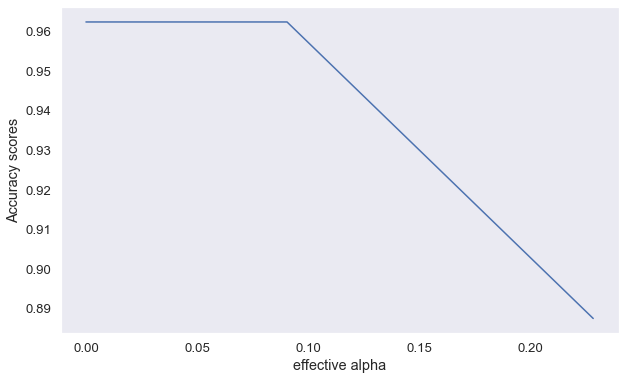

In [161]:
from sklearn.metrics import accuracy_score

acc_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

We can clearly see that somewhere around 0.00 to 0.09 alpha, we get a very good value of accuracy.

#### <font color = blue> Fit the model with optimal alpha value and plot the tree 

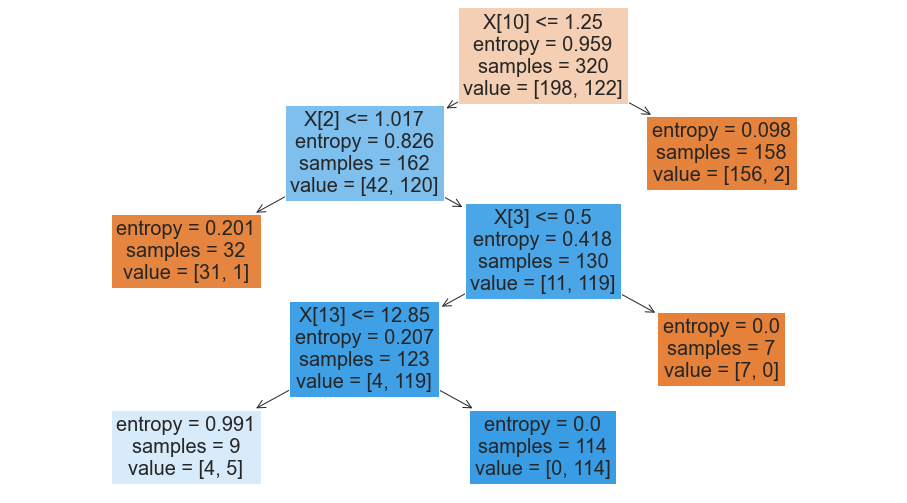

In [171]:
dt_sklearn1 = DecisionTreeClassifier(ccp_alpha= 0.05, criterion = 'entropy', random_state = 0)
dt_sklearn1.fit(X_train, y_train)
plt.figure(figsize = (16, 9))
plot_tree(dt_sklearn1, filled=True)
plt.show()

After prunning see we can see the tree

#### <font color = blue> predict the train and and test accuracy

In [173]:
dt_sklearn_pred_test = dt_sklearn1.predict(X_test)
dt_sklearn_pred_train = dt_sklearn1.predict(X_train)
Accuracy_train = accuracy_score(dt_sklearn_pred_train, y_train)
Accuracy_test = accuracy_score(dt_sklearn_pred, y_test)
print(f"Training Accuracy is {Accuracy_train}")
print(f"Test Accuracy is {Accuracy_test}")

Training Accuracy is 0.978125
Test Accuracy is 0.9625


The difference is redcued between training and testing however the test accuracy is still 0.965  

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 4: </font> <font color = #4854E8> Evaluate the Result </font>
In this part, we evaluate the Decision tree model. first we make confusion matrix and we visualize the score following ("Accuracy", "Precision", "TPR", "FPR", "F-Score", "Specificity", "Error" and "Roc Area").

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 4.1: </font> <font color = #41EA46> Confusion Matrix</font>

<AxesSubplot:>

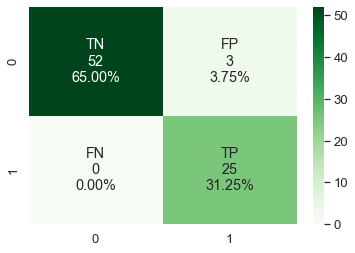

In [167]:
confusion_matrix_ = confusion_matrix(dt_sklearn_pred_test, y_test)

#[row, column]
TP = confusion_matrix_[1, 1]        
TN = confusion_matrix_[0, 0]           
FP = confusion_matrix_[0, 1]           
FN = confusion_matrix_[1, 0]

group_names = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix_.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix_.flatten()/np.sum(confusion_matrix_)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion_matrix_, annot=labels, fmt='', cmap='Greens')

### <font color = #27C3E5> 4.2: </font> <font color = #41EA46>  Evaluate the Results </font>

#### <font color = blue>4.2.1: Calculate the Results

In [168]:
# Accuracy Score
Accuracy = accuracy_score(dt_sklearn_pred_test, y_test)
print('Accuracy Score:', Accuracy) 

# Precision Score
Precision = precision_score(dt_sklearn_pred_test, y_test)
print('Precision Score:', Precision)   

# True positive Rate (TPR) or Sensitivity or Recall
TPR = recall_score(dt_sklearn_pred_test, y_test)
print('True positive Rate:', TPR)             

# False positive Rate (FPR)
FPR = FP / float(TN + FP)
print('False positive Rate', FPR)                       

# F1 Score or F-Measure or F-Score
F1 = f1_score(dt_sklearn_pred_test, y_test)
print('F1 Score:', F1)                 

# Specificity
Specificity = TN / (TN + FP)
print('Specificity:', Specificity )                    

# Mean Absolute Error
Error = mean_absolute_error(dt_sklearn_pred_test, y_test)
print('Mean Absolute Error:', Error)   

# ROC Area
Roc = roc_auc_score(dt_sklearn_pred_test, y_test)
print('ROC Area:', Roc) 

Accuracy Score: 0.9625
Precision Score: 0.8928571428571429
True positive Rate: 1.0
False positive Rate 0.05454545454545454
F1 Score: 0.9433962264150945
Specificity: 0.9454545454545454
Mean Absolute Error: 0.0375
ROC Area: 0.9727272727272727


#### <font color = blue>4.2.2: Visualize the Results

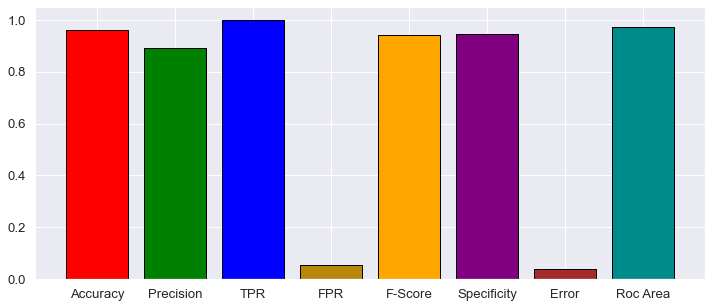

In [169]:
plt.figure(figsize = (12, 5))

result = [Accuracy, Precision, TPR, FPR, F1, Specificity, Error, Roc]
label = ["Accuracy", "Precision", "TPR", "FPR", "F-Score", "Specificity", "Error", "Roc Area"]
colors=[ 'red', 'green', 'blue', 'darkgoldenrod', 'orange', 'purple', 'brown', 'darkcyan']

plt.bar(label, result, color = colors, edgecolor='black')
plt.show()

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<b>©</b>Amir Ali